We got hung up on Boas $\S 1.14 \#3$ in class today. The reason is a bit silly, so I'll do some extra credit to make up for it. Here's the problem:

If $0 < x < \frac{1}{2}$, show [using theorem (14.3)] that $\sqrt{1+x} = 1+\frac{1}{2}x$ with an error less than 0.032. Hint: Note that the series is alternating after the first term.

So, here's the theorem asked for:

**Theorem 14.3**: If $S = \sum_{n=1}^{\infty}a_n$ is an alternating series with $\left|a_{n+1}\right| < \left|a_n\right|$, and $\lim_{n\to\infty} a_n = 0$, then $\left|S-(a_1+a_2+\cdots+a_n)\right| \le \left|a_{n+1}\right|$

Great. That's straightforward. We can treat our series as $(1+x)^{\frac{1}{2}}$ and use the binomial expansion with $p=\frac{1}{2}$. That gives the first few terms as $1 + \frac{1}{2} x - \frac{1}{8} x^2 \cdots$

And, since it's clear that increasing $x$ increases the sum, so we can just plug in $x=\frac{1}{2}$. Let's do that. It tells us that our error ought to be less than

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def exact(x):
    return np.sqrt(1+x)
def estimate(x):
    return 1+0.5*x
def error(x):
    return np.abs(exact(x) - estimate(x))
def error_bound(x):
    return (1/8)*x**2

In [3]:
error_bound(1/2)

0.03125

And, sure enough, that's less than 0.032. Just to double-check:

In [4]:
print('Exact',exact(1/2))
print('estimate',estimate(1/2))
print('error',error(1/2))

Exact 1.22474487139
estimate 1.25
error 0.0252551286084


What was so confusing in class?

Well, we started trying to use Theorem 14.4, which says basically the same thing as Theorem 14.3, except that it's for a power series. It requires that the terms after $N$ are an alternating seriess, and the error ends up $< \left|a_{N+1}x^{N+1}\right|\div\left(1-\left|x\right|\right)$.

So, first of all, let's see what the error looks like as you increase x

In [5]:
def error_bound2(x):
    return ((1/8)*x**2)/(1-np.abs(x))

/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


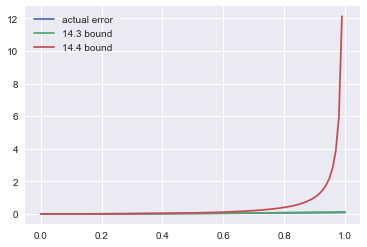

In [7]:
x = np.linspace(0,1,100)
plt.plot(x,error(x),label='actual error')
plt.plot(x,error_bound(x),label='14.3 bound')
plt.plot(x,error_bound2(x),label='14.4 bound')
plt.legend();

That makes sense. The bound in 14.4 was more general. Using 14.3 in this specific case let us use a more specific answer. We can zoom in a bit to see the difference in our range:

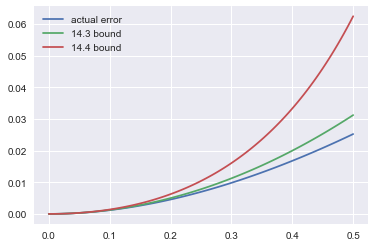

In [8]:
x = np.linspace(0,1/2,100)
plt.plot(x,error(x),label='actual error')
plt.plot(x,error_bound(x),label='14.3 bound')
plt.plot(x,error_bound2(x),label='14.4 bound')
plt.legend();

And that's a useful lesson: the more you know about your system, the more precise your error estimate can be.